<a href="https://colab.research.google.com/github/r-aax/colab-cases/blob/main/q_balance_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import numpy as np
import matplotlib.pyplot as plt

def draw_graphics(ds):
  """
  Draw graphics.
  """

  fig, ax = plt.subplots(figsize=(16, 6))
  plt.rcParams['font.size'] = '16'
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

  colors = ['black', 'dimgray', 'gray', 'darkgray', 'silver']
  i = 0
  for d in ds:
    x, y = list(zip(*d))
    ax.plot(x, y, '-', color=colors[i % 5])
    i = i + 1

  plt.ylim([-1.0e10, 1.0e10])
  plt.xlabel('Temperature (C)', fontsize=20)
  plt.ylabel('Q balance delta (J / (m^2 * s))', fontsize=20)
  ax.grid()
  plt.show()

Построение графика функции невязки теплового баланса

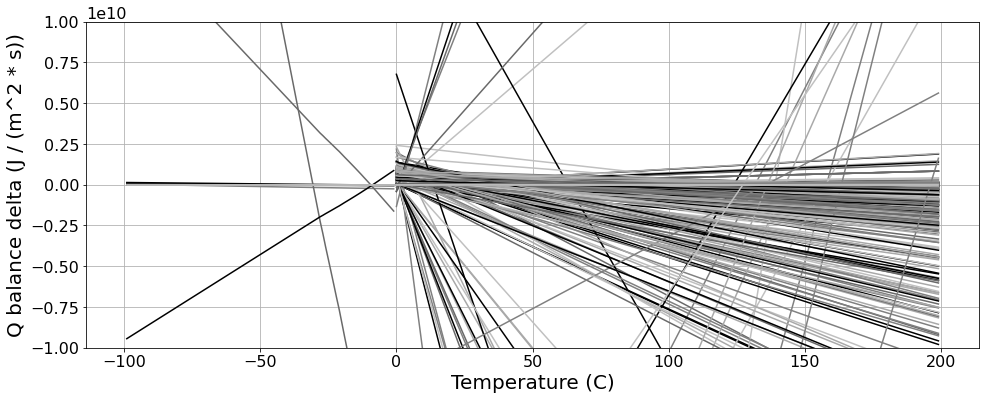

In [179]:
def get_ds_from_files(fns):
  """
  Get all ds from files.
  """

  count = 30000
  res = []
  tr = {ord(x): None for x in 'F[]()'}

  for fn in fns:
    with open(fn, 'r') as f:
      i = 0
      ln = f.readline()
      
      while (i < count) and ln:
        try:

          ln = ln.translate(tr).replace(',', ' ')
          sln = ln.split()
          grp = [sln[2 * i : 2 * i + 2] for i in range(len(sln) // 2)]

          d = list(map(lambda x: (float(x[0]), float(x[1])), grp))
          d = [x for x in d if ((x[0] > -100.0) and (x[0] < 200.0))]

          #if (d[0][0] * d[-1][0] >= 0):
          #if (abs(d[0][1]) < 1.0e9):
          #  if (abs(d[-1][1]) < 1.0e9):
          #      if (d[0][0] >= 0.0):
          if (d[0][1] * d[-1][1] <= 0.0):
            res.append(d)
          i = i + 1

        except BaseException:
          pass
        ln = f.readline()

  return res

# Get files names and run draw graphics.
#short_names = ['mi_tm/mi_tm5.f.data', 'mi_tm/mi_tm10.f.data',
#               'mi_tm/mi_tm15.f.data', 'mi_tm/mi_tm20.f.data',
#               'mi_tm/mi_tm25.f.data', 'mi_tm/mi_tm30.f.data']
short_names = ['mi_tm/mi_tm5.f.data']
names = list(map(lambda s: '/content/drive/My Drive/Colab Notebooks/' + s, short_names))
ds = get_ds_from_files(names)
draw_graphics(ds)